# SW중심대학 공동 AI 경진대회 <본선>

1. 평가 산식

> - Accuracy (정확도)

2. 본선 평가

![](https://dacon.s3.ap-northeast-2.amazonaws.com/competition/235970/editor-image/166138683752218.jpeg)

3. 개인 또는 팀 참여 규칙

> - 본선 진출자는 예선과 동일한 팀원 및 팀명으로 참가해야 함
> - 본선 진출자 전원은 9/16(금)까지 재학증명서 또는 휴학증명서를 dacon@dacon.io 메일로 제출하야 함 [링크]
> ※ 허위 참가사실이 확인되거나 혹은 기간내 서류 제출을 하지 않을 시, 소속 팀 전체가 대회 탈락 처리됨을 유의 부탁드립니다.
> ※ 또한, 대회 기간 도중 팀원 중 졸업생 신분의 참가자가 포함되어있는 것이 확인될 경우에도 해당 팀 전체가 대회 탈락 처리됩니다.

 

4. 외부 데이터 및 사전 학습 모델 사용

> - 비상업적 용도로 사용할 수 있는 외부 데이터 사용 가능
> - 사용에 문제가 없는 사전 학습 모델(Pre-trained Model) 사용 가능


5. 유의 사항

> - 1일 최대 제출 횟수: 3회
> - 사용 가능 언어: Python, R
> - 모델 학습에서 평가 데이터셋(Test Dataset) 활용(Data Leakage) 시 실격 처리 됨 (참조 : 링크)
> - 답안을 수기로 작성하는 경우 실격 처리 됨
> - 다른 팀과의 아이디어 또는 코드 쉐어링이 의심되는 경우 데이콘에서 코드를 요청할 수 있으며, 기간 내 코드를 제출하지 않거나 치팅이 확인되는 경우 실격 처리 됨
> - 재학/휴학 증명서, 발표 자료 및 코드를 요청한 일자에 제출하지 않은 경우 실격 처리 됨
> - 최종 순위는 선택된 파일 중에서 채점되므로 참가자는 제출 창에서 자신이 최종적으로 채점을 받고 싶은 파일을 선택해야 함
> - 소프트웨어중심대학 공동 AI 경진대회 추진위원회는 대회 참가팀의 부정 행위를 금지하고 있으며, 이와 관련하여 본 경기를 위탁 운영하는 데이콘의 다른 경진대회에서 부정 제출 이력이 있는 경우에는 평가가 제한됩니다.
> - 자세한 사항은 아래의 링크를 참고해 주시기 바랍니다. https://dacon.io/notice/notice/13

6. 토론(질문)

> - 대회 운영 및 데이터 이상에 관련된 질문 외에는 답변을 드리지 않습니다.
> - 기타 질문은 토론 페이지를 통해 자유롭게 토론해주시기 바랍니다.
> - 소프트웨어중심대학 공동 AI 경진대회 추진위원회의 답변을 희망하시는 경우에는 토크 게시판의 대회 문의 게시글에 댓글을 달아주시면 검토하여 답변을 드리겠습니다.


## 모듈 및 설정

### 모듈
- pandas

In [2]:
import os
import cv2

import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from trdg.generators import GeneratorFromRandom, GeneratorFromStrings
from unicode import join_jamos

Missing modules for handwritten text generation.


## 데이터

In [2]:
inputs = 'inputs'
outputs = 'outputs'

train = pd.read_csv(inputs + '/train.csv')
target = pd.read_csv(inputs + '/test.csv')
submission = pd.read_csv(outputs + '/sample_submission.csv')

In [40]:
for img_path in train['img_path'][:5]:
    img = cv2.imread(os.path.join(inputs, img_path))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(img.shape)

NameError: name 'train' is not defined

<PIL.Image.Image image mode=RGB size=132x64 at 0x20092E0B808>


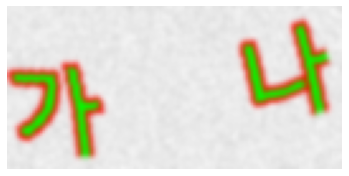

<PIL.Image.Image image mode=RGB size=68x64 at 0x2009186CD48>


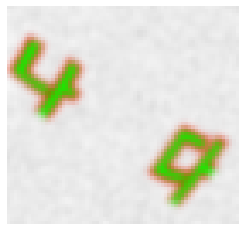

<PIL.Image.Image image mode=RGB size=128x64 at 0x20092DD3D08>


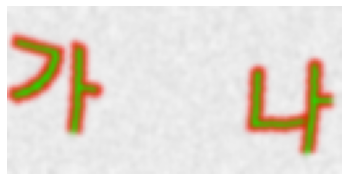

<PIL.Image.Image image mode=RGB size=65x64 at 0x20092C779C8>


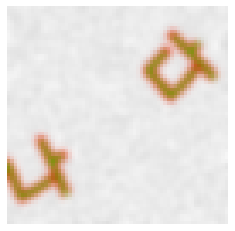

In [121]:
from importlib_metadata import distribution


size_list = [] # Random int
blur_list = [True, False]
background_type = [0, 1, 2]
distorsion_type = [0, 1, 2, 3]
distorsion_orientation = [0, 1, 2]
text_color = [] # Random color
orientation = [0, 1]
character_spacing = [] # Random int
margins = [(0,0,0,0)] # Random int
strok_width = [0, 1, 2, 3]
stroke_fill = [] # Random color

generator = GeneratorFromStrings(
    ['가나', '나다'],
    count=4,
    language='ko',
    size=64,
    skewing_angle=45,
    random_skew=True,
    blur=True,
    background_type=0,
    distorsion_type=1,
    distorsion_orientation=2,
    text_color='#00FF00',
    orientation=0,
    character_spacing=100,
    margins=(0, -10, 0, 0),
    stroke_width=3,
    stroke_fill='#FF0000',
)

for img, lbl in generator:
    print(img)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [28]:
first = [*'ㄱㄲㄴㄷㄸㄹㅁㅂㅃㅅㅆㅇㅈㅉㅊㅋㅌㅍㅎ']
middle = [*'ㅏㅐㅑㅒㅓㅔㅕㅖㅗㅘㅙㅚㅛㅜㅝㅞㅟㅠㅡㅢㅣ']
last = [''] + [*'ㄱㄲㄳㄴㄵㄶㄷㄹㄺㄻㄼㄽㄾㄿㅀㅁㅂㅄㅅㅆㅇㅈㅊㅋㅌㅍㅎ']

ko = [join_jamos(f'{f}{m}{l}') for f in first for m in middle for l in last]

In [120]:
len(set(first + middle + last))

52

In [119]:
len(set([*'ㄱㄲㄳㄴㄵㄶㄷㄸㄹㄺㄻㄼㄽㄾㄿㅀㅁㅂㅄㅃㅅㅆㅇㅈㅉㅊㅋㅌㅍㅎㅏㅐㅑㅒㅓㅔㅕㅖㅗㅘㅙㅚㅛㅜㅝㅞㅟㅠㅡㅢㅣ']))

51